In [2]:
import Pkg; Pkg.add("Optim")

    Updating registry at `C:\Users\25674\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\25674\.julia\environments\v1.6\Project.toml`
  [429524aa] + Optim v1.5.0
  No Changes to `C:\Users\25674\.julia\environments\v1.6\Manifest.toml`


In [21]:
using PyPlot, Random, LinearAlgebra, Optim   # Packages needed

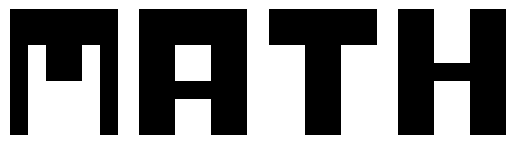

In [22]:
charstr = """
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          O.OO.O  OO..OO  ..OO..  OO..OO
          O.OO.O  OO..OO  ..OO..  OOOOOO
          O....O  OOOOOO  ..OO..  OO..OO
          O....O  OO..OO  ..OO..  OO..OO
          O... O  OO..OO  ..OO..  OO..OO
          """

training = reshape(collect(charstr), :, 7)
training = Int.(training[[1:6;9:14;17:22;25:30],:] .== 'O')
training = reshape(training', 7*6, 4)
target = [0 0; 0 1; 1 0; 1 1]'
mapstr = "MATH";

function plot_chars(images)
    gray()
    n_images = size(images,2)
    for j = 1:n_images
        subplot(ceil(Int, n_images/4), 4, j)
        im = 1 .- reshape(images[:,j], 7, 6)
        imshow(im); axis("off");
    end
end
plot_chars(training)

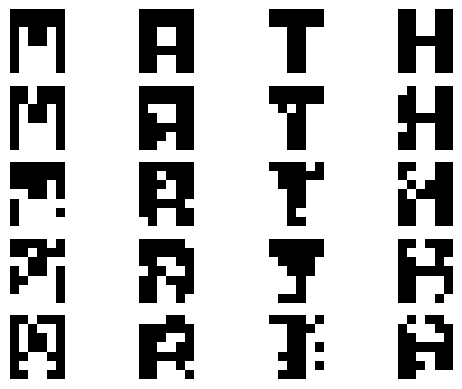

In [23]:
function make_testdata(training)
    A = copy(training)
    for i = 1:4
        B = copy(training)
        C = randperm(42)
        D = randperm(42)
        E = randperm(42)
        F = randperm(42)
        rand = [C D E F]
        for j = 1:2i
            for k = 1:4
                B[rand[j,k],k] = 1 - B[rand[j,k],k]
            end
        end
        A = [A B]
    end
    return A
end
testdata = make_testdata(training);
plot_chars(testdata)

In [ ]:
sigma(x) = 1/(1+exp(0.5-x))

function parametric_ode_system!(dx, x, p, t)
  x, y = u
  a1, b1, c1, d1, a2, b2, c2, d2 = p
  du[1] = dx = a1*x + b1*y + c1*exp(-d1*t)
  du[2] = dy = a2*x + b2*y + c2*exp(-d2*t)
end
